In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/Advertising.csv")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Exploratory Data Analysis

In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


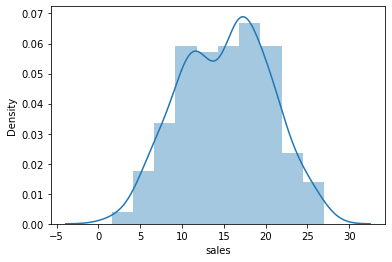

In [6]:
sns.distplot(data.sales);

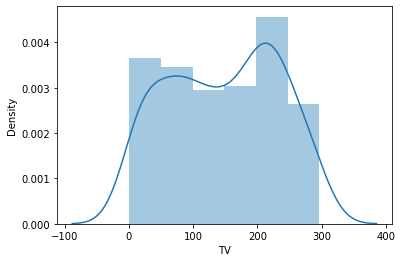

In [7]:
sns.distplot(data.TV);

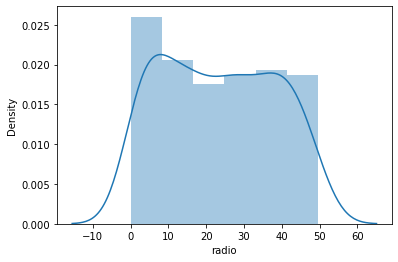

In [8]:
sns.distplot(data.radio);

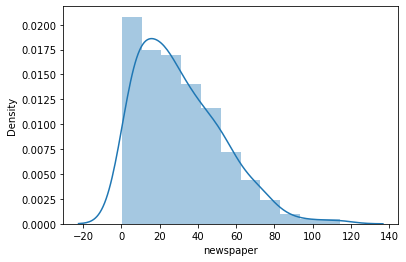

In [9]:
sns.distplot(data.newspaper);

>Sales seems to be normally distributed.

>Spend of Newspaper is right skewed. Most of the people spend less on newspaper.

>TV and Radio are normally distributed.

In [10]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


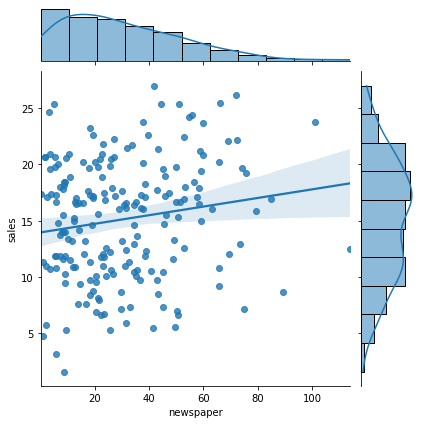

In [11]:
sns.jointplot("newspaper","sales",data=data, kind='reg');

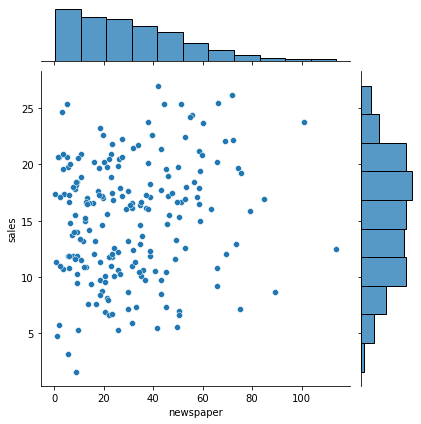

In [12]:
sns.jointplot("newspaper","sales",data=data);

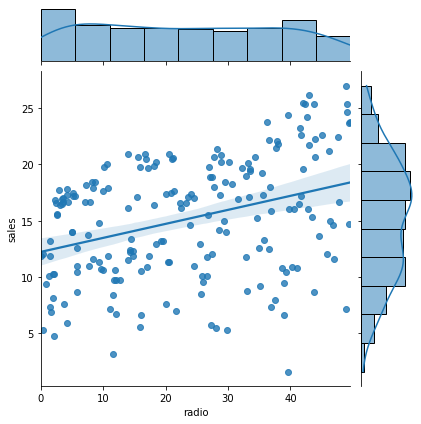

In [13]:
sns.jointplot("radio","sales",data=data, kind='reg');

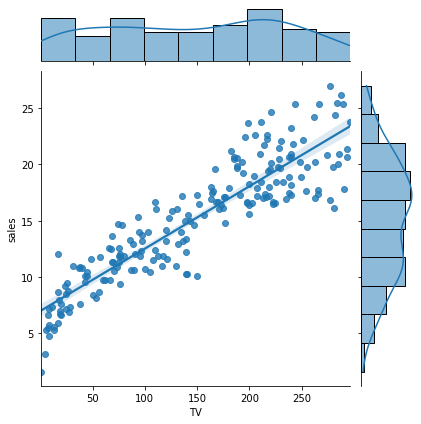

In [14]:
sns.jointplot("TV","sales",data=data, kind='reg');

>TV is most important for predicting Sales.

>Radio is less important for predicting Sales.

>Newspaper is least important/not important for predicting Sales.

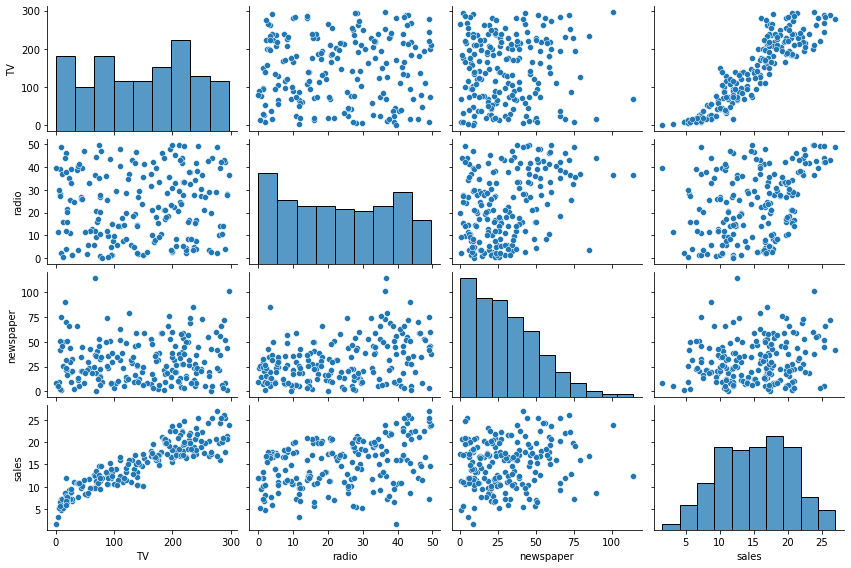

In [15]:
sns.pairplot(data, size=2, aspect=1.5);

__We always want a high correlation between Independent Variable and Dependent Variable. The more high it is, the better is the feature for predicting the Target Variable.__


__However, there must be least correlation between any two Independent variables. If any independent variables have high positive or high negative correlation, then it leads to a major issue in ML which is called MULTICOLLINEARITY.__

__If we find two Independent variables with high positive or high negative correlation, then we remove any one of the Independent variable.__

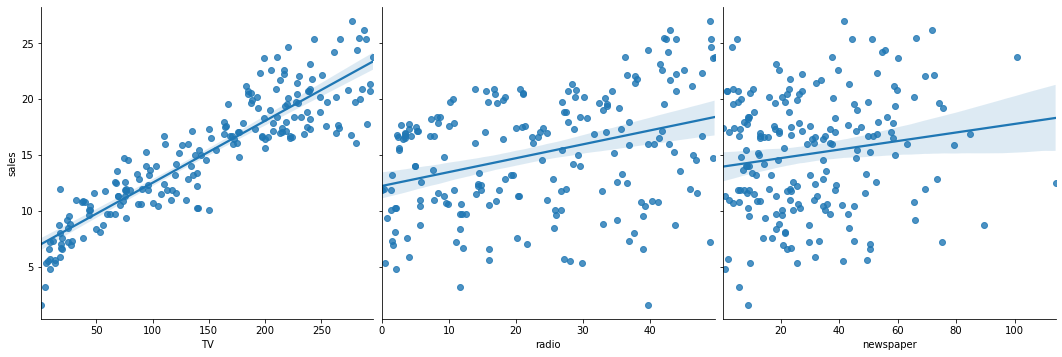

In [16]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=5, aspect=1, kind='reg');

In [17]:
cor = data.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.901208
radio,0.054809,1.000000,0.354104,0.349631
newspaper,0.056648,0.354104,1.000000,0.157960
sales,0.901208,0.349631,0.157960,1.000000


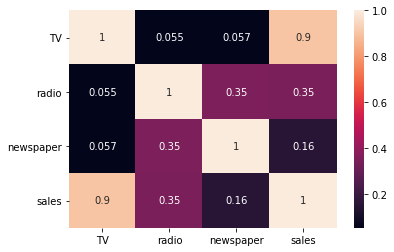

In [18]:
sns.heatmap(cor, annot=True);

# Data Preparation

In [19]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [20]:
X = data.iloc[:,:-1]
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [21]:
y = data.iloc[:,-1]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: sales, Length: 200, dtype: float64

In [22]:
X.shape

(200, 3)

In [23]:
y.shape

(200,)

In [24]:
# Not a part of Linear Regression

import random
print(random.random())

0.7663093395383884


In [25]:
# Not a part of Linear Regression
for i in range(20):
    print(random.random(), end=" | ")

0.7856937552535989 | 0.8604536447157166 | 0.04625188337487962 | 0.1438439254390418 | 0.6570095100261747 | 0.679604697603969 | 0.9949597962349241 | 0.6388649197076561 | 0.0016412239611469648 | 0.09048114359455173 | 0.6410733483914689 | 0.6610741484886613 | 0.3956525641769416 | 0.9738310568243101 | 0.1614221006275468 | 0.1425488277510304 | 0.2647022081203957 | 0.2711146206945586 | 0.9111691899152766 | 0.10360500604661749 | 

In [26]:
# Not a part of Linear Regression

import random
random.seed(0)
print(random.random())

0.8444218515250481


In [27]:
# Not a part of Linear Regression

import random
random.seed(11)
print(random.random())

0.4523795535098186


In [28]:
# Not a part of Linear Regression

import random
random.seed(1001)
print(random.random())

0.7966509679599704


In [29]:
# Not a part of Linear Regression

import random
random.seed(5)
print(random.random())

0.6229016948897019


In [30]:
X.shape

(200, 3)

In [31]:
y.shape

(200,)

## Splitting X  and y into training and testing data

In [32]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
# It is good to have train size atleast twice that of test size

In [33]:
X_train.shape

(160, 3)

In [34]:
X_test.shape

(40, 3)

In [35]:
y_train.shape

(160,)

In [36]:
y_test.shape

(40,)

In [37]:
X_train.head()

,TV,radio,newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6


In [38]:
X_test.head()

,TV,radio,newspaper
18,69.2,20.5,18.3
170,50.0,11.6,18.4
107,90.4,0.3,23.2
98,289.7,42.3,51.2
177,170.2,7.8,35.2


In [39]:
X_train.tail()

,TV,radio,newspaper
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5
172,19.6,20.1,17.0


In [40]:
y_train

134    10.8
66     11.0
26     15.0
113    20.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: sales, Length: 160, dtype: float64

In [41]:
X_train.describe()

,TV,radio,newspaper
count,160.000000,160.000000,160.000000
mean,150.518125,23.388125,30.125625
std,84.957371,14.736240,21.444814
min,4.100000,0.000000,0.900000
25%,76.375000,9.525000,11.675000
50%,157.400000,24.300000,25.900000
75%,220.350000,36.350000,45.100000
max,296.400000,49.600000,100.900000


# 5 Oct, 2021 || Tue || Linear Regression

# Standardization/Scaling

There are many ways of scaling the data, however, the following 3 are very popular in the industry stated below in the order of their importance:

>1. Standard Scaling

>2. Min-Max Scaling

>3. Robust Scaling


Below cells are not a part of Linear Regression. They help us understand the concept the Scaling and it is very important for every ML algorithm to be supplied with scaled data.

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [43]:
views = pd.DataFrame([1295,25,19000.,5,1,300], columns=['VIEW'])
views

,VIEW
0,1295.0
1,25.0
2,19000.0
3,5.0
4,1.0
5,300.0


# Standard Scaling

![Standard Scaling](https://miro.medium.com/max/866/1*qXXqcZXhSTgw9tVhx7zNNw.gif "Standard Scaling")

In [44]:
views.describe()

,VIEW
count,6.000000
mean,3437.666667
std,7640.187999
min,1.000000
25%,10.000000
50%,162.500000
75%,1046.250000
max,19000.000000


In [45]:
sc = StandardScaler() # create object of Standard Scaler
views['zscore'] = sc.fit_transform(views[['VIEW']])
views

,VIEW,zscore
0,1295.0,-0.307214
1,25.0,-0.489306
2,19000.0,2.231317
3,5.0,-0.492173
4,1.0,-0.492747
5,300.0,-0.449877


Because, Standard Scaling is the z-score, it gets the column converted to Normal Distribution.

In [46]:
hh = sns.load_dataset('titanic')
hh.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


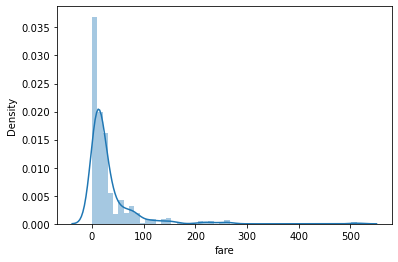

In [47]:
sns.distplot(hh.fare);

In [48]:
sc_hh = StandardScaler()
hh[['fare']] = sc_hh.fit_transform(hh[['fare']])
hh.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,-0.502445,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,0.786845,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,-0.488854,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,0.420730,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,-0.486337,S,Third,man,True,NaN,Southampton,no,True


In [49]:
hh.fare.describe()

count    8.910000e+02
mean    -4.373606e-17
std      1.000562e+00
min     -6.484217e-01
25%     -4.891482e-01
50%     -3.573909e-01
75%     -2.424635e-02
max      9.667167e+00
Name: fare, dtype: float64

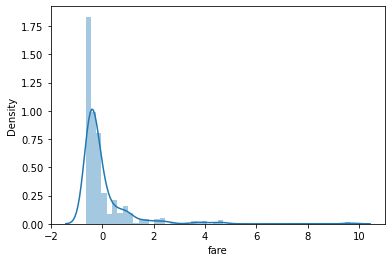

In [50]:
sns.distplot(hh.fare);

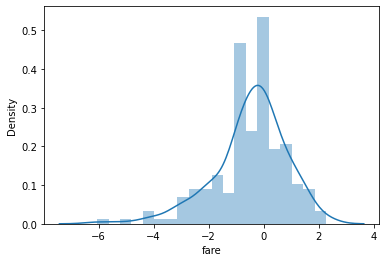

In [51]:
sns.distplot(np.log(hh.fare));

# Min-Max Scaling

![Min-Max Scaling](https://media.geeksforgeeks.org/wp-content/uploads/min-max-normalisation.jpg "Min-Max Scaling")

In [52]:
views.head()

,VIEW,zscore
0,1295.0,-0.307214
1,25.0,-0.489306
2,19000.0,2.231317
3,5.0,-0.492173
4,1.0,-0.492747


In [53]:
mms = MinMaxScaler()
views['minmax'] = mms.fit_transform(views[['VIEW']])
views

,VIEW,zscore,minmax
0,1295.0,-0.307214,0.068109
1,25.0,-0.489306,0.001263
2,19000.0,2.231317,1.000000
3,5.0,-0.492173,0.000211
4,1.0,-0.492747,0.000000
5,300.0,-0.449877,0.015738


In [54]:
hh = sns.load_dataset('titanic')
hh.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [55]:
mms_hh = MinMaxScaler()
hh[['fare']] = mms_hh.fit_transform(hh[['fare']])
hh.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,0.014151,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,0.139136,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,0.015469,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,0.103644,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,0.015713,S,Third,man,True,NaN,Southampton,no,True


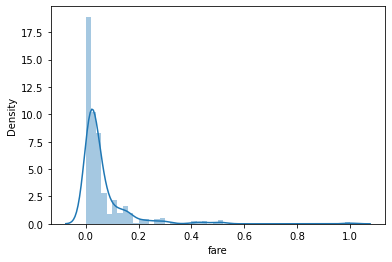

In [56]:
sns.distplot(hh.fare);

# Robust Scaling

![Robust Scaling](https://media.geeksforgeeks.org/wp-content/uploads/20200624151526/for4.png "Robust Scaling")

In [57]:
views

,VIEW,zscore,minmax
0,1295.0,-0.307214,0.068109
1,25.0,-0.489306,0.001263
2,19000.0,2.231317,1.000000
3,5.0,-0.492173,0.000211
4,1.0,-0.492747,0.000000
5,300.0,-0.449877,0.015738


In [58]:
views.VIEW.describe()

count        6.000000
mean      3437.666667
std       7640.187999
min          1.000000
25%         10.000000
50%        162.500000
75%       1046.250000
max      19000.000000
Name: VIEW, dtype: float64

In [59]:
rs = RobustScaler()
views['robust'] = rs.fit_transform(views[['VIEW']])
views

,VIEW,zscore,minmax,robust
0,1295.0,-0.307214,0.068109,1.092883
1,25.0,-0.489306,0.001263,-0.132690
2,19000.0,2.231317,1.000000,18.178528
3,5.0,-0.492173,0.000211,-0.151990
4,1.0,-0.492747,0.000000,-0.155850
5,300.0,-0.449877,0.015738,0.132690


In [60]:
hh = sns.load_dataset('titanic')
hh.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [61]:
rs_hh = RobustScaler()
hh[['fare']] = rs_hh.fit_transform(hh[['fare']])
hh.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,-0.312011,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,2.461242,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,-0.282777,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,1.673732,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,-0.277363,S,Third,man,True,NaN,Southampton,no,True


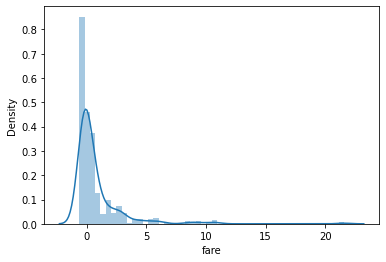

In [62]:
sns.distplot(hh.fare);

![Scaling](https://miro.medium.com/max/2456/1*A9d4SEX0t_bAAPzZeVqwAQ.png "Scaling")

# Linear Regression Continues...

In [63]:
X_train.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TV', 'radio', 'newspaper']] = scaler.fit_transform(X_train[['TV', 'radio', 'newspaper']])
X_train.head()

,TV,radio,newspaper
134,-1.341553,1.035518,1.659411
66,-1.405314,0.082496,-1.306297
26,-0.089952,0.402439,-0.819809
113,0.697613,-0.189796,-0.908687
168,0.766097,0.014423,1.285189


In [65]:
X_train.describe()

,TV,radio,newspaper
count,1.600000e+02,1.600000e+02,1.600000e+02
mean,2.498002e-17,-1.670539e-16,-1.047773e-16
std,1.003140e+00,1.003140e+00,1.003140e+00
min,-1.728842e+00,-1.592099e+00,-1.367108e+00
25%,-8.754498e-01,-9.437042e-01,-8.630784e-01
50%,8.125819e-02,6.207404e-02,-1.976652e-01
75%,8.245444e-01,8.823534e-01,7.004673e-01
max,1.722510e+00,1.784320e+00,3.310665e+00


In [66]:
X_test.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [67]:
X_test[['TV', 'radio', 'newspaper']] = scaler.transform(X_test[['TV', 'radio', 'newspaper']])
X_test.head()

,TV,radio,newspaper
18,-0.960169,-0.196603,-0.553176
170,-1.186874,-0.802453,-0.548498
107,-0.709849,-1.571677,-0.323965
98,1.643399,1.287388,0.985811
177,0.232395,-1.061130,0.237368


# Modeling using Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [69]:
regressor

LinearRegression()

In [70]:
# y = mx + c
# Intercept c
regressor.intercept_

15.355625

In [71]:
# y = mx + c
# Slope
regressor.coef_

array([ 4.54624242,  1.6383335 , -0.07507122])

In [72]:
X_train.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [73]:
# y = m1*x1 + m2*x2 + m3*x3 + c
# y = 4.54624242*x1 + 1.6383335*x2 + (-0.07507122)*x3 + 15.355625

In [74]:
y_pred_test = regressor.predict(X_test)
y_pred_test

array([10.70988945,  8.68629773,  9.5778695 , 24.86207988, 14.65584473,
        8.3214275 , 10.43048002, 18.4453765 ,  9.73394291, 17.9290798 ,
       23.369886  , 10.67916356, 13.44032325, 17.17416235, 11.77380187,
       13.37072678, 21.26009906,  9.19666875, 14.13201846, 18.9260716 ,
       24.75507991, 12.48481182, 16.57130583, 13.77344772,  7.79299106,
       15.19648316, 14.71607944, 20.73862119, 17.01041859,  8.83474391,
       12.09424377, 20.74886454, 21.26147987, 21.90420095,  7.08087067,
        7.04431681,  9.15949871, 15.47796148, 13.28282334,  7.23769883])

In [75]:
print(y_test)

18     11.3
170     8.4
107    12.0
98     25.4
177    16.7
182     8.7
5       7.2
146    18.2
12      9.2
152    16.6
61     24.2
125    10.6
180    15.5
154    20.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     16.1
159    12.9
60      8.1
123    15.2
179    17.6
185    22.6
122    16.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      17.9
83     13.6
106     7.2
Name: sales, dtype: float64


In [76]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([10.82854696,  9.1999467 , 15.66755686, 18.28441044, 18.76563654,
       13.5578255 ,  5.46554711, 10.24015212, 15.35798265, 10.90303735,
       12.15078076, 20.43450999, 20.66736217, 16.9634418 ,  9.97774034,
        9.45843981, 23.50058204, 15.94383157, 18.01948292,  8.15357406,
       19.18158045, 15.75000711, 17.00831939, 15.27868163, 18.26380058,
       19.98829408, 22.03107586, 17.62807341, 11.22069262, 11.87977832,
       19.58867934, 12.4962567 , 22.47889831, 24.37804925, 11.45121116,
       15.81772994, 21.46383289, 19.23698119, 19.44385752, 18.85357902,
       18.16835447, 10.56704957,  9.89798803,  7.18796945,  5.43112588,
       19.25163068, 10.57219825, 19.34095833, 10.46427938, 15.28929431,
       16.72372112,  8.8833268 , 16.75837349, 12.24518887, 10.34790049,
       19.79976041, 24.94405796,  9.35259015, 22.05834552, 15.91386693,
        9.35785287, 10.00946274, 15.72270805, 21.09767063, 12.06153332,
       17.6102679 , 16.87762037, 16.48249632, 16.38605079, 17.86

In [77]:
y_train

134    10.8
66     11.0
26     15.0
113    20.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: sales, Length: 160, dtype: float64

In [78]:
X_test.tail()

,TV,radio,newspaper
189,-1.556451,-0.768416,-0.314609
129,-1.073522,-0.775224,0.606912
4,0.357555,-0.856911,1.322611
83,-0.969615,1.437148,0.256079
106,-1.482063,-0.843297,-0.019910


In [79]:
y_pred_test

array([10.70988945,  8.68629773,  9.5778695 , 24.86207988, 14.65584473,
        8.3214275 , 10.43048002, 18.4453765 ,  9.73394291, 17.9290798 ,
       23.369886  , 10.67916356, 13.44032325, 17.17416235, 11.77380187,
       13.37072678, 21.26009906,  9.19666875, 14.13201846, 18.9260716 ,
       24.75507991, 12.48481182, 16.57130583, 13.77344772,  7.79299106,
       15.19648316, 14.71607944, 20.73862119, 17.01041859,  8.83474391,
       12.09424377, 20.74886454, 21.26147987, 21.90420095,  7.08087067,
        7.04431681,  9.15949871, 15.47796148, 13.28282334,  7.23769883])

In [80]:
# y = m1*x1 + m2*x2 + m3*x3 + c
# y = 4.54624242*x1 + 1.6383335*x2 + (-0.07507122)*x3 + 15.355625
op = 4.54624242*(-1.482063) + 1.6383335*(-0.843297) + (-0.07507122)*(-0.019910) + 15.355625
op

7.237700262728239

In [81]:
op = 4.54624242*(-0.969615) + 1.6383335*(1.437148) + (-0.07507122)*(0.256079) + 15.355625
op

13.28282370584332

# Compute how good is out model.

# Happy Learning

# 7 Oct, 2021 || Thurs || Linear Regression


In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [83]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)
print(MAE_train," ",MAE_test)

1.192574010437895   1.417031303060066


In [84]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)
print(MSE_train," ",MSE_test)

2.267479192455655   4.522552562041288


In [85]:
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(RMSE_train," ",RMSE_test)

1.5058151255900092   2.1266293899128943


In [86]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print(R2_train," ",R2_test)

0.9132130769530317   0.8645053923967725


In [87]:
X_train.shape

(160, 3)

In [89]:
n = X_train.shape[0]
p = X_train.shape[1]
print(n,p)

160 3


In [90]:
num = (1-R2_train)*(n-1)
den = n-p-1
AR2_train = 1-(num/den)
AR2_train

0.9115440976636668

In [91]:
X_test.shape

(40, 3)

In [92]:
n = X_test.shape[0]
p = X_test.shape[1]
print(n,p)

40 3


In [93]:
num = (1-R2_test)*(n-1)
den = n-p-1
AR2_test = 1-(num/den)
AR2_test

0.8532141750965035

# Modeling with a new model using Linear Regression

In [94]:
X_train.head()

,TV,radio,newspaper
134,-1.341553,1.035518,1.659411
66,-1.405314,0.082496,-1.306297
26,-0.089952,0.402439,-0.819809
113,0.697613,-0.189796,-0.908687
168,0.766097,0.014423,1.285189


In [96]:
X_train.drop(['newspaper'], axis=1, inplace=True)

In [97]:
X_test.drop(['newspaper'], axis=1, inplace=True)

In [98]:
X_train.head()

,TV,radio
134,-1.341553,1.035518
66,-1.405314,0.082496
26,-0.089952,0.402439
113,0.697613,-0.189796
168,0.766097,0.014423


In [99]:
X_test.head()

,TV,radio
18,-0.960169,-0.196603
170,-1.186874,-0.802453
107,-0.709849,-1.571677
98,1.643399,1.287388
177,0.232395,-1.061130


In [100]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)

LinearRegression()

In [101]:
regressor2

LinearRegression()

In [102]:
# y = mx + c
# Intercept c
regressor2.intercept_

15.355625

In [103]:
# y = mx + c
# Slope
regressor2.coef_

array([4.53901133, 1.61441537])

In [104]:
X_train.columns

Index(['TV', 'radio'], dtype='object')

In [105]:
# y = m1*x1 + m2*x2 + c
# y = 4.53901133*x1 + 1.61441537*x2 + 15.355625

In [106]:
y_pred_test = regressor2.predict(X_test)
y_pred_test

array([10.68000732,  8.67289687,  9.59627362, 24.89341048, 14.697364  ,
        8.3567853 , 10.55863443, 18.38868264,  9.85132079, 17.86927795,
       23.41528097, 10.68859833, 13.39700653, 17.10227442, 11.74725693,
       13.31442741, 21.15105215,  9.1078251 , 14.1508319 , 18.85894126,
       24.8577903 , 12.44648472, 16.57547935, 13.79888848,  7.80545687,
       15.11832283, 14.69260423, 20.6616562 , 16.98730791,  8.88795212,
       12.37433351, 20.80729034, 21.28995356, 21.8483045 ,  7.17317454,
        7.05033262,  9.23136496, 15.59516171, 13.27468497,  7.2670912 ])

In [107]:
print(y_test)

18     11.3
170     8.4
107    12.0
98     25.4
177    16.7
182     8.7
5       7.2
146    18.2
12      9.2
152    16.6
61     24.2
125    10.6
180    15.5
154    20.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     16.1
159    12.9
60      8.1
123    15.2
179    17.6
185    22.6
122    16.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      17.9
83     13.6
106     7.2
Name: sales, dtype: float64


In [76]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([10.82854696,  9.1999467 , 15.66755686, 18.28441044, 18.76563654,
       13.5578255 ,  5.46554711, 10.24015212, 15.35798265, 10.90303735,
       12.15078076, 20.43450999, 20.66736217, 16.9634418 ,  9.97774034,
        9.45843981, 23.50058204, 15.94383157, 18.01948292,  8.15357406,
       19.18158045, 15.75000711, 17.00831939, 15.27868163, 18.26380058,
       19.98829408, 22.03107586, 17.62807341, 11.22069262, 11.87977832,
       19.58867934, 12.4962567 , 22.47889831, 24.37804925, 11.45121116,
       15.81772994, 21.46383289, 19.23698119, 19.44385752, 18.85357902,
       18.16835447, 10.56704957,  9.89798803,  7.18796945,  5.43112588,
       19.25163068, 10.57219825, 19.34095833, 10.46427938, 15.28929431,
       16.72372112,  8.8833268 , 16.75837349, 12.24518887, 10.34790049,
       19.79976041, 24.94405796,  9.35259015, 22.05834552, 15.91386693,
        9.35785287, 10.00946274, 15.72270805, 21.09767063, 12.06153332,
       17.6102679 , 16.87762037, 16.48249632, 16.38605079, 17.86

In [108]:
y_train

134    10.8
66     11.0
26     15.0
113    20.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: sales, Length: 160, dtype: float64

In [109]:
X_test.tail()

,TV,radio
189,-1.556451,-0.768416
129,-1.073522,-0.775224
4,0.357555,-0.856911
83,-0.969615,1.437148
106,-1.482063,-0.843297


In [110]:
y_pred_test

array([10.68000732,  8.67289687,  9.59627362, 24.89341048, 14.697364  ,
        8.3567853 , 10.55863443, 18.38868264,  9.85132079, 17.86927795,
       23.41528097, 10.68859833, 13.39700653, 17.10227442, 11.74725693,
       13.31442741, 21.15105215,  9.1078251 , 14.1508319 , 18.85894126,
       24.8577903 , 12.44648472, 16.57547935, 13.79888848,  7.80545687,
       15.11832283, 14.69260423, 20.6616562 , 16.98730791,  8.88795212,
       12.37433351, 20.80729034, 21.28995356, 21.8483045 ,  7.17317454,
        7.05033262,  9.23136496, 15.59516171, 13.27468497,  7.2670912 ])

In [111]:
# y = m1*x1 + m2*x2 + c
# y = 4.53901133*x1 + 1.61441537*x2 + 15.355625
op = 4.53901133*(-1.482063) + 1.61441537*(-0.843297) + 15.355625
op

7.26709261295132

# Compute how good is out model.

# Happy Learning

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [113]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)
print(MAE_train," ",MAE_test)

1.192574010437895   1.4032867136894107


In [114]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)
print(MSE_train," ",MSE_test)

2.267479192455655   4.4768183662081436


In [115]:
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(RMSE_train," ",RMSE_test)

1.5058151255900092   2.115849325024857


In [116]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print(R2_train," ",R2_test)

0.9132130769530317   0.8658755781123508


In [117]:
X_train.shape

(160, 2)

In [118]:
n = X_train.shape[0]
p = X_train.shape[1]
print(n,p)

160 2


In [119]:
num = (1-R2_train)*(n-1)
den = n-p-1
AR2_train = 1-(num/den)
AR2_train

0.9121075110543442

In [120]:
X_test.shape

(40, 2)

In [121]:
n = X_test.shape[0]
p = X_test.shape[1]
print(n,p)

40 2


In [122]:
num = (1-R2_test)*(n-1)
den = n-p-1
AR2_test = 1-(num/den)
AR2_test

0.8586256093616671

# End of Linear Regression